PROJECT DATA ANALISIS GROUP

1. Frenki Satriajaya
2. Thalia Wong
3. Kennedy Chen
4. Benedictus Darrell Sunanto Arup
5. Akmal Devara

* Dataset = Cuaca Daerah Kemayoran Periode Januari 2024-Oktober 2025 oleh BMKG
* Sumber Data = dataonline.bmkg.go.id

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Library yang digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Data preparation

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/[Revisi] Project Datnal/cuaca_kemayoran_bmkg_1997_2023.csv', sep=';')
df.head()

,TANGGAL,Temperatur minimum(°C),Temperatur maksimum(°C),Temperatur ratarata(°C),Kelembapan ratarata(%),Curah hujan(mm),Lamanya penyinaran matahari(jam),Kecepatan angin maksimum(m/s),Arah angin saat kecepatan maksimum(°),Kecepatan angin ratarata(m/s),Arah angin terbanyak(°)
0,01/01/1997,25,"28,7","26,6",82,8888,"2,6",6,280,3.0,W
1,02/01/1997,25,28,"26,4",78,"0,6","6,7",4,280,2.0,W
2,03/01/1997,23,28,"26,4",81,"73,4",5,5,290,3.0,W
3,04/01/1997,23,"28,9","25,9",86,"16,8",2,4,280,2.0,W
4,05/01/1997,23,"28,5","25,7",86,0,7,3,300,2.0,W


In [ ]:
df.tail()

,TANGGAL,Temperatur minimum(°C),Temperatur maksimum(°C),Temperatur ratarata(°C),Kelembapan ratarata(%),Curah hujan(mm),Lamanya penyinaran matahari(jam),Kecepatan angin maksimum(m/s),Arah angin saat kecepatan maksimum(°),Kecepatan angin ratarata(m/s),Arah angin terbanyak(°)
10238,27/12/2023,26,"33,2","28,7",80,0,0,9,320,1.0,C
10239,28/12/2023,27,"33,2","29,9",76,"2,5","3,8",4,320,1.0,C
10240,29/12/2023,27,33,"29,3",79,NaN,NaN,5,320,1.0,C
10241,30/12/2023,26,"32,6","29,2",79,2,4,5,330,1.0,C
10242,31/12/2023,27,"32,2","28,3",80,0,"2,4",5,290,1.0,C


In [ ]:
print("Tipe Data Awal")
df.info()

Tipe Data Awal
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10243 entries, 0 to 10242
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   TANGGAL                                10243 non-null  object 
 1   Temperatur minimum(°C)                 10135 non-null  object 
 2   Temperatur maksimum(°C)                10202 non-null  object 
 3   Temperatur ratarata(°C)                10222 non-null  object 
 4   Kelembapan ratarata(%)                 10228 non-null  object 
 5   Curah hujan(mm)                        9813 non-null   object 
 6   Lamanya penyinaran matahari(jam)       10080 non-null  object 
 7   Kecepatan angin maksimum(m/s)          10243 non-null  object 
 8   Arah angin saat kecepatan maksimum(°)  10242 non-null  object 
 9   Kecepatan angin ratarata(m/s)          10241 non-null  float64
 10  Arah angin terbanyak(°)                10243 non-null  

#Cleaning data

In [ ]:
cols_numeric = ['Temperatur minimum(°C)', 'Temperatur maksimum(°C)','Temperatur ratarata(°C)', 'Kelembapan ratarata(%)','Curah hujan(mm)', 'Lamanya penyinaran matahari(jam)', 'Kecepatan angin maksimum(m/s)', 'Kecepatan angin ratarata(m/s)']
for col in cols_numeric:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace(',', '.', regex=False)
        df[col] = df[col].replace(['-', ' - '], np.nan)
    df[col] = pd.to_numeric(df[col], errors='coerce') # diubah ke angka

In [ ]:
df['Curah hujan(mm)'] = df['Curah hujan(mm)'].replace([8888, 9999], np.nan) #Handle error values pada Data BMKG

In [ ]:
df['TANGGAL'] = pd.to_datetime(df['TANGGAL'], format='%d/%m/%Y', errors='coerce') #Tanggal & Sorting tgl bulan tahun
df = df.sort_values('TANGGAL').reset_index(drop=True)

In [ ]:
print("\n[INFO] Jumlah Missing Values SEBELUM Interpolasi:") #CEK MISSING VALUE SEBELUM DIISI
print(df[cols_numeric].isna().sum())
print(f"Total Baris Awal: {len(df)}")



[INFO] Jumlah Missing Values SEBELUM Interpolasi:
Temperatur minimum(°C)               110
Temperatur maksimum(°C)               42
Temperatur ratarata(°C)               21
Kelembapan ratarata(%)                17
Curah hujan(mm)                     1015
Lamanya penyinaran matahari(jam)     171
Kecepatan angin maksimum(m/s)          1
Kecepatan angin ratarata(m/s)          2
dtype: int64
Total Baris Awal: 10243


In [ ]:
df[cols_numeric] = df[cols_numeric].interpolate(method='linear') #Isi Data Kosong (Interpolasi Linear)
df = df.dropna().reset_index(drop=True)

In [ ]:
print(df[cols_numeric].isna().sum())#CEK HASIL AKHIR (MISSING VALUE & TIPE DATA

Temperatur minimum(°C)              0
Temperatur maksimum(°C)             0
Temperatur ratarata(°C)             0
Kelembapan ratarata(%)              0
Curah hujan(mm)                     0
Lamanya penyinaran matahari(jam)    0
Kecepatan angin maksimum(m/s)       0
Kecepatan angin ratarata(m/s)       0
dtype: int64


In [ ]:
print(df[cols_numeric].dtypes)

Temperatur minimum(°C)              float64
Temperatur maksimum(°C)             float64
Temperatur ratarata(°C)             float64
Kelembapan ratarata(%)              float64
Curah hujan(mm)                     float64
Lamanya penyinaran matahari(jam)    float64
Kecepatan angin maksimum(m/s)       float64
Kecepatan angin ratarata(m/s)       float64
dtype: object


In [ ]:
display(df.sample(10))

,TANGGAL,Temperatur minimum(°C),Temperatur maksimum(°C),Temperatur ratarata(°C),Kelembapan ratarata(%),Curah hujan(mm),Lamanya penyinaran matahari(jam),Kecepatan angin maksimum(m/s),Arah angin saat kecepatan maksimum(°),Kecepatan angin ratarata(m/s),Arah angin terbanyak(°)
5332,2010-08-10,26.0,33.5,29.2,72.0,0.00,8.0,4.0,270,2.0,W
4872,2009-09-03,26.0,33.4,29.0,68.0,0.00,6.5,4.0,90,4.0,E
9423,2021-10-06,25.5,33.2,28.7,77.0,12.15,6.8,4.0,330,1.0,C
7093,2015-06-07,28.0,33.4,29.5,74.0,0.00,6.5,3.0,160,1.0,N
1367,2000-09-30,26.0,33.2,29.7,66.0,0.00,5.5,4.0,50,2.0,E
9415,2021-09-28,25.0,33.2,29.0,80.0,7.50,7.0,5.0,330,2.0,C
5680,2011-07-24,26.0,32.8,28.6,81.0,2.50,6.0,4.0,270,3.0,S
586,1998-08-11,26.0,32.8,28.8,71.0,0.00,0.5,5.0,70,2.0,E
7833,2017-06-16,26.0,33.8,29.3,78.0,3.50,3.0,3.0,120,2.0,SE
4783,2009-07-21,26.0,33.6,29.3,66.0,0.00,5.0,3.0,45,2.0,NW


#FEATURE ENGINEERING & VISUALISASI
##membuat fitur dan target

### Fitur waktu

In [ ]:
df['Bulan'] = df['TANGGAL'].dt.month
df['Bulan_Sin'] = np.sin(2 * np.pi * df['Bulan']/12)
df['Bulan_Cos'] = np.cos(2 * np.pi * df['Bulan']/12)

###Fitur Lag (Data Hari Sebelumnya)

In [ ]:
df['Suhu_Maks_Kemarin'] = df['Temperatur maksimum(°C)'].shift(1)
df['Hujan_Kemarin'] = df['Curah hujan(mm)'].shift(1)
df['Lembap_Kemarin'] = df['Kelembapan ratarata(%)'].shift(1)
df['Angin_Kemarin'] = df['Kecepatan angin maksimum(m/s)'].shift(1)

###Fitur Tren (Rolling)

In [ ]:
df['Rata2_Suhu_Maks_7Hari'] = df['Temperatur maksimum(°C)'].shift(1).rolling(7).mean()
df['Rata2_Hujan_7Hari'] = df['Curah hujan(mm)'].shift(1).rolling(7).mean()
df['Rata2_Lembap_7Hari'] = df['Kelembapan ratarata(%)'].shift(1).rolling(7).mean()
df['Rata2_Angin_3Hari'] = df['Kecepatan angin maksimum(m/s)'].shift(1).rolling(3).mean()


###Fitur menentukan target(Prediksi BESOK)

In [ ]:
df['Target_Suhu_Maks'] = df['Temperatur maksimum(°C)'].shift(-1)
df['Target_Status_Hujan'] = (df['Curah hujan(mm)'].shift(-1) > 1.0).astype(int)
df['Target_Hujan_Amount'] = df['Curah hujan(mm)'].shift(-1)
df['Target_Lembap'] = df['Kelembapan ratarata(%)'].shift(-1)
df['Target_Angin'] = df['Kecepatan angin maksimum(m/s)'].shift(-1)

####Hapus NaN & Reset Index

In [ ]:
df_model = df.dropna().reset_index(drop=True)
split_idx = int(len(df_model) * 0.8) # Titik potong

In [ ]:
display(df_model[['TANGGAL', 'Suhu_Maks_Kemarin', 'Target_Suhu_Maks', 'Target_Status_Hujan']].head())

,TANGGAL,Suhu_Maks_Kemarin,Target_Suhu_Maks,Target_Status_Hujan
0,1997-01-09,28.1,28.8,1
1,1997-01-10,30.3,29.7,0
2,1997-01-11,28.8,30.2,1
3,1997-01-12,29.7,28.5,1
4,1997-01-13,30.2,26.8,1


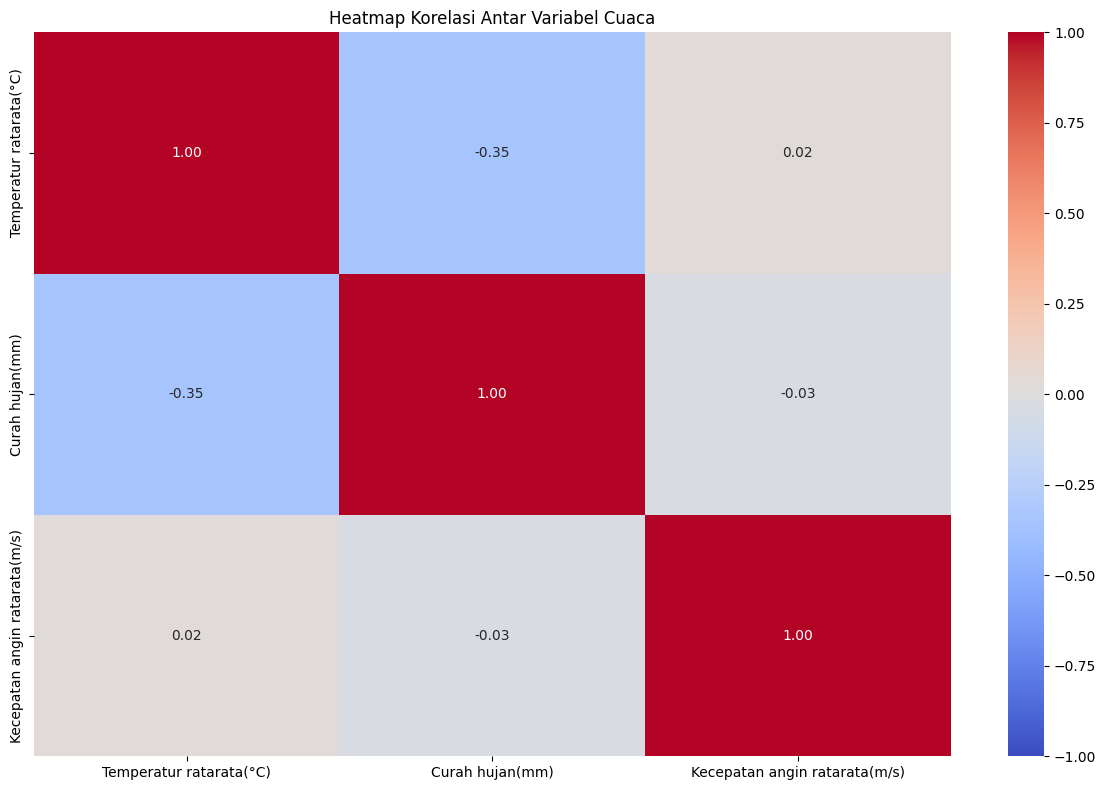

In [ ]:
numeric_cols_list = ['Temperatur ratarata(°C)','Curah hujan(mm)','Kecepatan angin ratarata(m/s)']

df_numeric = df[numeric_cols_list]
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix,annot=True,fmt='.2f',cmap='coolwarm',vmin=-1,vmax=1)
plt.title('Heatmap Korelasi Antar Variabel Cuaca')
plt.tight_layout()
plt.show()

*catatan tambahan:
feature engineering dilakukan untuk meningkatkan kemampuan model untuk nantinya melakukan prediksi. rinciannya sebagai berikut.
1. Fitur waktu: untuk membantu model untuk memahami konsep bulan itu bersiklus/berputar seperti roda, bukan seperti garis lurus. Jadi, jarak bulan seperti dari Desember ke Januari itu akan dipahami oleh model berjarak 1 bulan, bukan 11 bulan. Cara agar model memahami siklus tersebut adalah dengan membuat fitur baru dengan Sin/Cos dengan begitu konsep berputar seperti roda akan dimengerti oleh model.

2. Fitur lag: secara singkat fitur ini membantu model untuk memprediksi hari esok dengan melihat kondisi di hari ini. Misal jika hari ini hujan, maka kemungkinan besok masih bisa hujan lagi dan kelembapan akan tinggi.

3. Fitur tren: Kurang lebih cara kerjanya sama seperti fitur lag, namun tidak berdasarkan satu hari saja melainkan bisa 7 hingga 3 hari kebelakang.

## MODEL SUHU MAKSIMUM

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

feats_suhu = ['Suhu_Maks_Kemarin', 'Rata2_Suhu_Maks_7Hari', 'Lembap_Kemarin',
              'Hujan_Kemarin', 'Bulan_Sin', 'Bulan_Cos']

X = df_model[feats_suhu]
y = df_model['Target_Suhu_Maks']

# train_test_split
X_train, X_test, y_train_suhu, y_test_suhu = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

# Scale features
scaler_suhu = StandardScaler() # Menggunakan scaler_suhu gak tabrakan dengan scaler lain.
X_train_scaled = scaler_suhu.fit_transform(X_train)
X_test_scaled = scaler_suhu.transform(X_test)

rf_suhu = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf_suhu.fit(X_train_scaled, y_train_suhu)
pred_suhu = rf_suhu.predict(X_test_scaled)

mae_suhu = mean_absolute_error(y_test_suhu, pred_suhu)
print(f"MAE Suhu Maks: {mae_suhu:.2f} °C")

MAE Suhu Maks: 0.91 °C


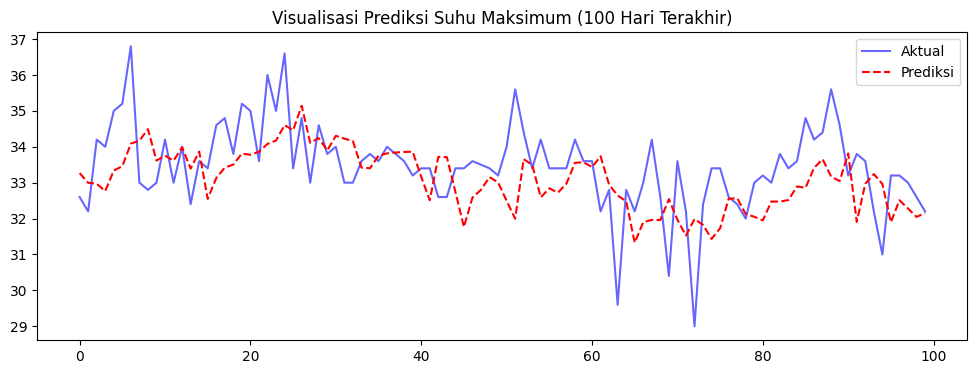

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(y_test_suhu.values[-100:], label='Aktual', color='blue', alpha=0.6)
plt.plot(pred_suhu[-100:], label='Prediksi', color='red', linestyle='--')
plt.title('Visualisasi Prediksi Suhu Maksimum (100 Hari Terakhir)')
plt.legend()
plt.show()

###MODEL HUJAN (TWO-STAGE) status dan hujan

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

feats_hujan = ['Hujan_Kemarin', 'Rata2_Hujan_7Hari', 'Lembap_Kemarin',
               'Suhu_Maks_Kemarin', 'Bulan_Sin', 'Bulan_Cos']

X = df_model[feats_hujan]
y_stat = df_model['Target_Status_Hujan']
y_amt = df_model['Target_Hujan_Amount']

# Split data using train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)
X_train, X_test, y_train_stat, y_test_stat, y_train_amt, y_test_amt = train_test_split(
    X, y_stat, y_amt, test_size=0.2, shuffle=False, random_state=42
)

# Scale features
scaler_hujan = StandardScaler()
X_train_scaled = scaler_hujan.fit_transform(X_train)
X_test_scaled = scaler_hujan.transform(X_test)

### A. klasifikasi

In [ ]:
rf_class = RandomForestClassifier(n_estimators=100, max_depth=10, class_weight='balanced', random_state=42, n_jobs=-1)
rf_class.fit(X_train, y_train_stat)
pred_stat = rf_class.predict(X_test)
prob_rain = rf_class.predict_proba(X_test)[:, 1]

### B. regresi ( hanya data hujan )

In [ ]:
mask_rain = y_train_stat == 1
rf_amt = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42, n_jobs=-1)
rf_amt.fit(X_train[mask_rain], y_train_amt[mask_rain])

RandomForestRegressor(max_depth=5, n_jobs=-1, random_state=42)

Akurasi Status: 68.9% | MAE Jumlah: 9.64 mm


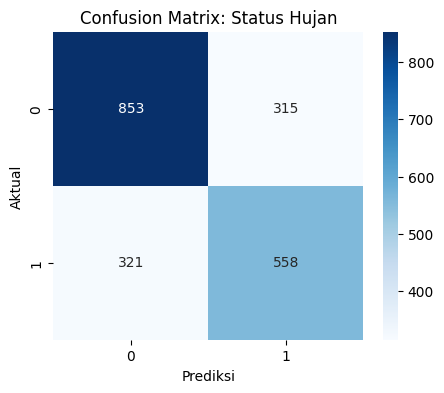

In [ ]:
# Prediksi Gabungan
pred_raw = rf_amt.predict(X_test)
pred_amt = np.where(prob_rain > 0.4, pred_raw, 0)

# Evaluasi
acc_hujan = accuracy_score(y_test_stat, pred_stat)
mae_hujan = mean_absolute_error(y_test_amt, pred_amt)
print(f"Akurasi Status: {acc_hujan*100:.1f}% | MAE Jumlah: {mae_hujan:.2f} mm")

# VISUALISASI CONFUSION MATRIX
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test_stat, pred_stat), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Status Hujan')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

Visualisasi Regresi: Suhu Maksimum Aktual vs Prediksi


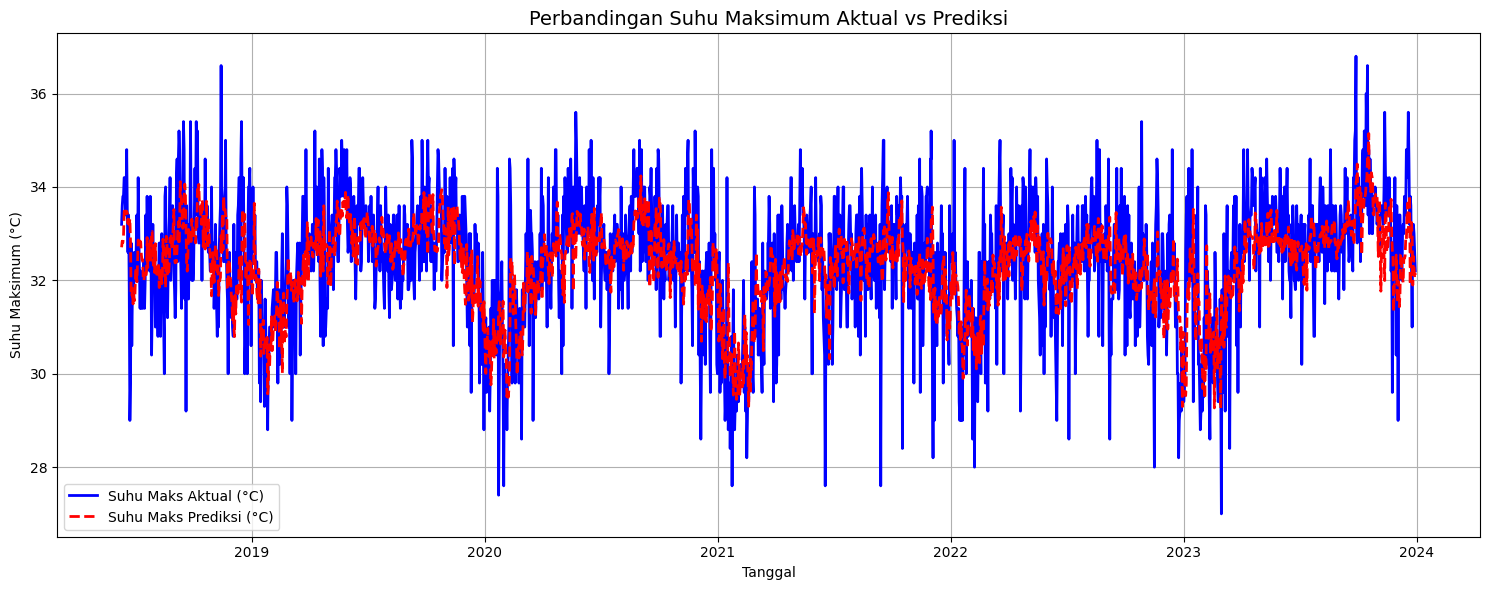

In [ ]:
print("Visualisasi Regresi: Suhu Maksimum Aktual vs Prediksi")

# Ambil tanggal sesuai test set
tanggal_test = df_model.iloc[X_test.index]['TANGGAL']

# DataFrame untuk visualisasi
df_vis_suhu = pd.DataFrame({
    'Tanggal': tanggal_test.values,
    'Suhu_Maks_Aktual': y_test_suhu.values,
    'Suhu_Maks_Prediksi': pred_suhu
})

plt.figure(figsize=(15, 6))
plt.plot(df_vis_suhu['Tanggal'], df_vis_suhu['Suhu_Maks_Aktual'], label='Suhu Maks Aktual (°C)', linewidth=2, color='blue')
plt.plot(df_vis_suhu['Tanggal'], df_vis_suhu['Suhu_Maks_Prediksi'], label='Suhu Maks Prediksi (°C)', linestyle='--', linewidth=2, color='red')
plt.title('Perbandingan Suhu Maksimum Aktual vs Prediksi', fontsize=14)
plt.xlabel('Tanggal')
plt.ylabel('Suhu Maksimum (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


*catatan tambahan:

Model two-stage digunakan untuk meningkatkan hasil prediksi model dengan cara membagi tugas prediksi menjadi dua bagian.

Pada bagian (stage) pertama data model akan menentukan terlebih dahulu apakah hari yang terkait hujan atau tidak. Bila tidak, maka prediksi akan berhenti dan tidak dilanjutkan. Jika iya, maka prediksi akan dilanjutkan ke tahap selanjutnya untuk menentukan curah hujan maksimal yang mungkin terjadi pada hari yang terkait. Dengan penerapan model two stage, maka model tidak akan secara tiba-tiba memprediksi curah hujan pada hari yang sebenarnya tidak hujan.

###model kelembapan

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
feats_hum = ['Lembap_Kemarin', 'Rata2_Lembap_7Hari', 'Hujan_Kemarin',
             'Suhu_Maks_Kemarin', 'Bulan_Sin', 'Bulan_Cos']

X = df_model[feats_hum]
y = df_model['Target_Lembap']

In [ ]:
X_train, X_test, y_train_hum, y_test_hum = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

In [ ]:
# Scale features
scaler_hum = StandardScaler()
X_train_scaled = scaler_hum.fit_transform(X_train)
X_test_scaled = scaler_hum.transform(X_test)

rf_hum = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf_hum.fit(X_train_scaled, y_train_hum)
pred_hum = rf_hum.predict(X_test_scaled)

mae_hum = mean_absolute_error(y_test_hum, pred_hum)
print(f"MAE Kelembapan: {mae_hum:.2f} %")

MAE Kelembapan: 3.88 %


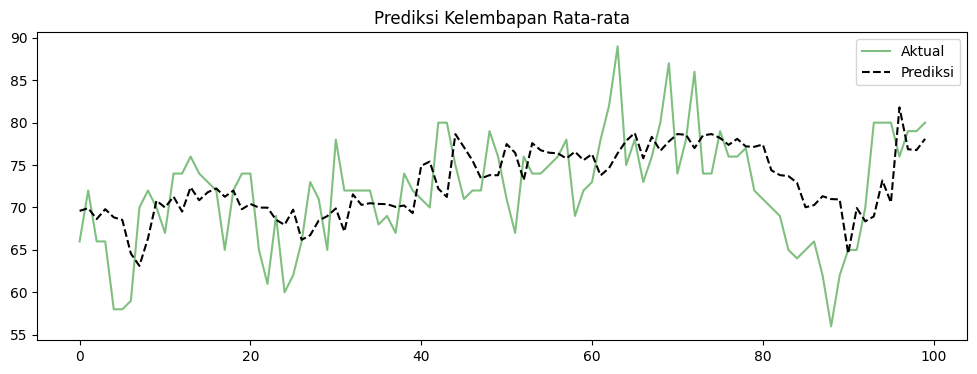

In [ ]:
# VISUALISASI
plt.figure(figsize=(12, 4))
plt.plot(y_test_hum.values[-100:], label='Aktual', color='green', alpha=0.5)
plt.plot(pred_hum[-100:], label='Prediksi', color='black', linestyle='--')
plt.title('Prediksi Kelembapan Rata-rata')
plt.legend()
plt.show()

### model kecepatan angin maksimun

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

feats_wind = ['Angin_Kemarin', 'Rata2_Angin_3Hari', 'Suhu_Maks_Kemarin',
              'Hujan_Kemarin', 'Bulan_Sin', 'Bulan_Cos']


In [ ]:
X = df_model[feats_wind]
y = df_model['Target_Angin']

In [ ]:
# Split data using train_test_split
X_train, X_test, y_train_wind, y_test_wind = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

In [ ]:
# Scale features
scaler_wind = StandardScaler()
X_train_scaled = scaler_wind.fit_transform(X_train)
X_test_scaled = scaler_wind.transform(X_test)

rf_wind = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf_wind.fit(X_train_scaled, y_train_wind)
pred_wind = rf_wind.predict(X_test_scaled)

mae_wind = mean_absolute_error(y_test_wind, pred_wind)
print(f"MAE Angin: {mae_wind:.2f} m/s")

MAE Angin: 1.23 m/s


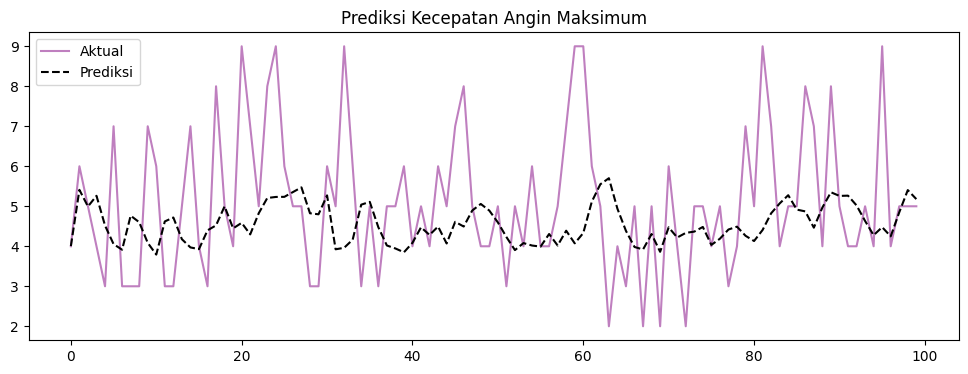

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(y_test_wind.values[-100:], label='Aktual', color='purple', alpha=0.5)
plt.plot(pred_wind[-100:], label='Prediksi', color='black', linestyle='--')
plt.title('Prediksi Kecepatan Angin Maksimum')
plt.legend()
plt.show()

### model Curah Hujan

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Fitur untuk prediksi curah hujan
feats_rain = ['Hujan_Kemarin', 'Rata2_Hujan_7Hari', 'Suhu_Maks_Kemarin',
              'Lembap_Kemarin','Bulan_Sin', 'Bulan_Cos']

X = df_model[feats_rain]
y = df_model['Target_Hujan_Amount']   # Curah hujan besok (mm)

In [ ]:
# Definisikan dan latih model Jumlah Curah Hujan (rf_amt)
X_train_amt, X_test_amt, y_train_amt, y_test_amt = train_test_split(X, y_amt, test_size=0.2, shuffle=False, random_state=42)

In [ ]:
# Standard scaler (pake pengukur skala yang sama seperti untuk status hujan, karena fiturnya serupa)
scaler_amt = StandardScaler() # Create a new scaler for amount
X_train_amt_scaled = scaler_amt.fit_transform(X_train_amt)
X_test_amt_scaled = scaler_amt.transform(X_test_amt)

rf_amt = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf_amt.fit(X_train_amt_scaled, y_train_amt)
pred_amt = rf_amt.predict(X_test_amt_scaled)

mae_hujan = mean_absolute_error(y_test_amt, pred_amt)
print(f"MAE Curah Hujan: {mae_hujan:.2f} mm")

MAE Curah Hujan: 7.61 mm


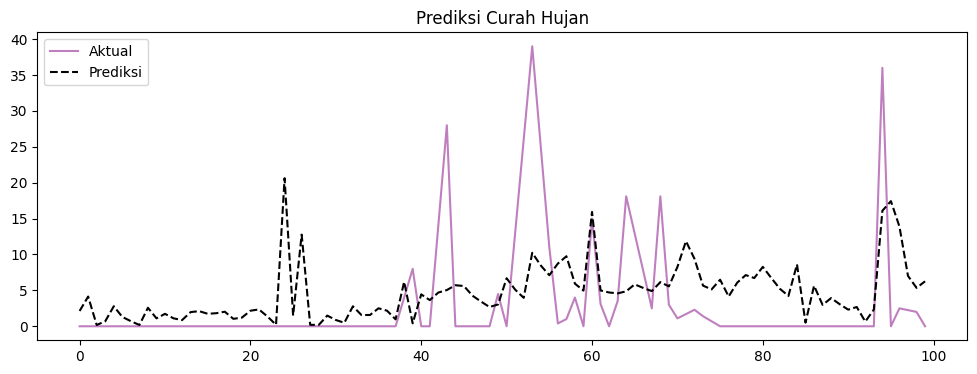

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(y_test_amt.values[-100:], label='Aktual', color='purple', alpha=0.5)
plt.plot(pred_amt[-100:], label='Prediksi', color='black', linestyle='--')
plt.title('Prediksi Curah Hujan')
plt.legend()
plt.show()

In [ ]:
# Fungsi pembantu untuk menampilkan tabel importance dengan rapih
def cek_pengaruh(model, nama_fitur, judul_model):
    # Ambil nilai importance dari Random Forest
    importances = model.feature_importances_

    # Buat DataFrame
    df_imp = pd.DataFrame({
        'Data Input (Fitur)': nama_fitur,
        'Tingkat Pengaruh (%)': (importances * 100).round(2)
    })

    # Urutkan dari yang paling berpengaruh
    df_imp = df_imp.sort_values('Tingkat Pengaruh (%)', ascending=False).reset_index(drop=True)

    print(f" --- MODEL: {judul_model} ---")
    print(f"Faktor Utama: {df_imp.iloc[0]['Data Input (Fitur)']} ({df_imp.iloc[0]['Tingkat Pengaruh (%)']} %)")
    display(df_imp)
    print("-" * 60 + "\n")

# 1. Analisis Model Suhu
cek_pengaruh(rf_suhu, feats_suhu, "Suhu Maksimum")

# 2. Analisis Model Status Hujan
cek_pengaruh(rf_class, feats_hujan, "Status Hujan (Klasifikasi)")

# 3. Analisis Model Kelembapan
cek_pengaruh(rf_hum, feats_hum, "Kelembapan Udara")

# 4. Analisis Model Angin
cek_pengaruh(rf_wind, feats_wind, "Kecepatan Angin")

# 5. Analisis Model Jumlah Hujan
cek_pengaruh(rf_amt, feats_hujan, "Jumlah Curah Hujan (mm)")

 --- MODEL: Suhu Maksimum ---
Faktor Utama: Rata2_Suhu_Maks_7Hari (61.97 %)


,Data Input (Fitur),Tingkat Pengaruh (%)
0,Rata2_Suhu_Maks_7Hari,61.97
1,Suhu_Maks_Kemarin,12.14
2,Hujan_Kemarin,8.71
3,Lembap_Kemarin,8.07
4,Bulan_Cos,5.28
5,Bulan_Sin,3.83


------------------------------------------------------------

 --- MODEL: Status Hujan (Klasifikasi) ---
Faktor Utama: Rata2_Hujan_7Hari (30.0 %)


,Data Input (Fitur),Tingkat Pengaruh (%)
0,Rata2_Hujan_7Hari,30.00
1,Lembap_Kemarin,18.90
2,Suhu_Maks_Kemarin,15.75
3,Bulan_Cos,13.02
4,Hujan_Kemarin,12.76
5,Bulan_Sin,9.57


------------------------------------------------------------

 --- MODEL: Kelembapan Udara ---
Faktor Utama: Rata2_Lembap_7Hari (59.85 %)


,Data Input (Fitur),Tingkat Pengaruh (%)
0,Rata2_Lembap_7Hari,59.85
1,Lembap_Kemarin,15.69
2,Suhu_Maks_Kemarin,8.64
3,Hujan_Kemarin,7.80
4,Bulan_Sin,4.30
5,Bulan_Cos,3.72


------------------------------------------------------------

 --- MODEL: Kecepatan Angin ---
Faktor Utama: Rata2_Angin_3Hari (28.83 %)


,Data Input (Fitur),Tingkat Pengaruh (%)
0,Rata2_Angin_3Hari,28.83
1,Suhu_Maks_Kemarin,23.84
2,Hujan_Kemarin,22.09
3,Angin_Kemarin,10.61
4,Bulan_Cos,7.56
5,Bulan_Sin,7.07


------------------------------------------------------------

 --- MODEL: Jumlah Curah Hujan (mm) ---
Faktor Utama: Rata2_Hujan_7Hari (34.8 %)


,Data Input (Fitur),Tingkat Pengaruh (%)
0,Rata2_Hujan_7Hari,34.80
1,Hujan_Kemarin,19.33
2,Lembap_Kemarin,19.06
3,Suhu_Maks_Kemarin,15.57
4,Bulan_Cos,5.69
5,Bulan_Sin,5.55


------------------------------------------------------------



*catatan tambahan: Feature Importance dibuat untuk membantu memberikan insight terkait feature apa yang paling berpengaruh ke hasil prediksi.

*catatan tambahan: Bulan_Cos (x) dan Bulan_Sin (y) digunakan untuk memberitahu model bahwa bulan Desember (bulan 12) itu dekat dengan bulan Januari (bulan 1) dengan selisih hanya 1, bukan 12 (dihitung dari Januari ke Desember). Kenapa pake Sin dan Cos? Agar penggambaran konsep bulan dibuat sedimikian rupa seperti sebuah roda, dengan begitu konsep bulan Desember ke Januari hanya berjarak 1 bulan dapat dipahami oleh sistem. Intinya kalau tanpa konsep Sin/Cos, model akan melihat jarak bulan seperti di penggaris, sementara kalau pake konsep Sin/Cos model akan melihat jarak bulan seperti roda.

In [ ]:
# 1. Samakan panjang array (lebih safety)
# pakai test_size=0.2 dan shuffle=False untuk semua, panjangnya seharusnya konsisten.
min_len = min(len(y_test_suhu), len(y_test_stat), len(y_test_hum), len(y_test_wind), len(y_test_amt))

# 2. Buat DataFrame Komparasi Lengkap
df_hasil = pd.DataFrame({
    'Tanggal': df_model.iloc[len(df_model) - min_len:]['TANGGAL'].values, # Disesuaikan untuk dapat tanggal yang benar yang sesuai dengan data uji.

    # A. SUHU (Maksimum)
    'Suhu_Maks_Aktual': y_test_suhu.values[:min_len],
    'Suhu_Maks_Prediksi': pred_suhu[:min_len].round(1),

    # B. KELEMBAPAN (Aktual & Prediksi)
    'Lembap_Aktual(%)': y_test_hum.values[:min_len],
    'Lembap_Prediksi(%)': pred_hum[:min_len].round(1),

    # C. ANGIN (Maksimum) - Aktual & Prediksi
    'Angin_Maks_Aktual(m/s)': y_test_wind.values[:min_len],
    'Angin_Maks_Prediksi(m/s)': pred_wind[:min_len].round(1),

    # D. CURAH HUJAN (Jumlah mm)
    'Hujan_Aktual(mm)': y_test_amt.values[:min_len],
    'Hujan_Prediksi(mm)': pred_amt[:min_len].round(1),

    # E. STATUS HUJAN (Klasifikasi)
    'Status_Aktual': y_test_stat.values[:min_len],
    'Status_Prediksi': pred_stat[:min_len],
    'Peluang_Hujan(%)': (prob_rain[:min_len] * 100).round(0).astype(int)
})

# 3. Mapping Label (0 -> Cerah, 1 -> Hujan)
# Lakukan pada kolom Aktual dan Prediksi agar mudah dibandingkan
df_hasil['Status_Aktual'] = df_hasil['Status_Aktual'].map({0: 'Cerah', 1: 'Hujan'})
df_hasil['Status_Prediksi'] = df_hasil['Status_Prediksi'].map({0: 'Cerah', 1: 'Hujan'})

# 4. Tampilkan 10 Baris Acak
# Menggunakan .sample(10) agar tiap kali run hasilnya beda (tidak cuma ekor data)
display(df_hasil.sample(10))

,Tanggal,Suhu_Maks_Aktual,Suhu_Maks_Prediksi,Lembap_Aktual(%),Lembap_Prediksi(%),Angin_Maks_Aktual(m/s),Angin_Maks_Prediksi(m/s),Hujan_Aktual(mm),Hujan_Prediksi(mm),Status_Aktual,Status_Prediksi,Peluang_Hujan(%)
1722,2023-02-09,31.8,30.8,77.0,80.1,7.0,3.9,9.600000,16.2,Hujan,Hujan,79
1695,2023-01-13,32.0,32.3,72.0,73.6,3.0,4.3,0.000000,6.9,Cerah,Cerah,37
713,2020-05-24,35.0,33.1,72.0,77.1,4.0,4.7,0.666667,5.0,Cerah,Hujan,50
83,2018-09-02,31.8,32.5,79.0,73.3,8.0,3.9,17.600000,4.9,Hujan,Cerah,29
310,2019-04-17,34.6,32.6,74.0,76.6,6.0,4.4,0.000000,5.8,Cerah,Cerah,47
745,2020-06-25,32.6,32.8,78.0,75.1,5.0,3.6,0.000000,4.3,Cerah,Cerah,40
892,2020-11-16,32.2,33.7,78.0,72.5,6.0,4.3,0.000000,4.3,Cerah,Cerah,36
1320,2022-01-03,32.4,31.6,71.0,79.1,5.0,4.4,0.000000,8.8,Cerah,Hujan,66
1787,2023-04-15,33.4,33.0,80.0,75.6,3.0,5.0,2.000000,5.0,Hujan,Cerah,46
346,2019-05-23,34.6,33.4,66.0,72.5,3.0,3.9,0.000000,2.6,Cerah,Cerah,30


In [ ]:
print("=== RANGKUMAN EVALUASI SEMUA MODEL YANG DIGUNAKAN ===")

# 1. Menentukan Kualitas Model (pake logic)
# Suhu: Error < 1.5 derajat = Sangat Baik
kualitas_suhu = 'SANGAT BAIK' if mae_suhu < 1.5 else 'CUKUP'
# Hujan Status: Akurasi > 75% = Baik
kualitas_stat = 'BAIK' if acc_hujan > 0.75 else 'CUKUP'
# Kelembapan: Error < 5% = Sangat Baik
kualitas_hum = 'SANGAT BAIK' if mae_hum < 5.0 else 'CUKUP'
# Angin: Error < 2 m/s = Baik
kualitas_wind = 'BAIK' if mae_wind < 2.0 else 'CUKUP'
# Hujan Jumlah: Error < 15 mm = Baik (karena sulit)
kualitas_rain = 'BAIK' if mae_hujan < 15.0 else 'CUKUP (SULIT)'

# 2. Menyusun Data Summary Lengkap
summary_data = {
    'Nama Model': [
        'RF Regressor (Suhu)',
        'RF Classifier (Status)',
        'RF Regressor (Kelembapan)',
        'RF Regressor (Angin)',
        'RF Regressor (Jml Hujan)'
    ],
    'Target Prediksi': [
        'Temperatur MAKSIMAL (°C)',
        'Status Hujan (Ya/Tidak)',
        'Kelembapan Rata-rata (%)',
        'Kecepatan Angin Maks (m/s)',
        'Curah Hujan (mm)'
    ],
    'Metrik & Arti': [               # <--- Kolom Penjelasan Error
        'MAE (Rata-rata Meleset)',
        'Accuracy (Ketepatan Tebakan)',
        'MAE (Rata-rata Meleset)',
        'MAE (Rata-rata Meleset)',
        'MAE (Rata-rata Meleset)'
    ],
    'Nilai Skor': [
        f"{mae_suhu:.2f} °C",
        f"{acc_hujan*100:.1f} %",
        f"{mae_hum:.2f} %",
        f"{mae_wind:.2f} m/s",
        f"{mae_hujan:.2f} mm"
    ],
    'Kualitas': [
        kualitas_suhu,
        kualitas_stat,
        kualitas_hum,
        kualitas_wind,
        kualitas_rain
    ]
}

# 3. Tampilkan Tabel
df_summary = pd.DataFrame(summary_data)
display(df_summary)

=== RANGKUMAN EVALUASI SEMUA MODEL YANG DIGUNAKAN ===


,Nama Model,Target Prediksi,Metrik & Arti,Nilai Skor,Kualitas
0,RF Regressor (Suhu),Temperatur MAKSIMAL (°C),MAE (Rata-rata Meleset),0.91 °C,SANGAT BAIK
1,RF Classifier (Status),Status Hujan (Ya/Tidak),Accuracy (Ketepatan Tebakan),68.9 %,CUKUP
2,RF Regressor (Kelembapan),Kelembapan Rata-rata (%),MAE (Rata-rata Meleset),3.88 %,SANGAT BAIK
3,RF Regressor (Angin),Kecepatan Angin Maks (m/s),MAE (Rata-rata Meleset),1.23 m/s,BAIK
4,RF Regressor (Jml Hujan),Curah Hujan (mm),MAE (Rata-rata Meleset),7.61 mm,BAIK


# KETERANGAN TAMBAHAN

Kegunaan prediksi temperatur maksimal: 1.) peringatan heatwaves

Kegunaan prediksi status hujan: 1.) sebagai bahan pertimbangan

Kegunaan prediksi kelembapan rata-rata: 1.)

Kegunaan prediksi kecepatan angin: 1.)

Kegunaan prediksi curah hujan: 1.)